# Initial Setup of Environment

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import pandas as pd
import seaborn as sns

# League of Legends Description

In each game there are 2 teams of five, the blue side and the red side, and teams battle, farm, and play objectives on the map to ultimately destroy the other team's nexus. 

Another vital part of the game is the gold of a player. Gold can be used to buy a maximum of 6 items that can make a player damage and defense advantages. Gold can be received from killing minions, monsters, and structures. 1 gold is also generated every second.  Team gold advantage usually means that a team is currently leading in the game. 


# Load and Clean Datasets


The datasets are from games played in the highest level of competitive play. More specifically, Master, GrandMaster, and Challenger. 

In perspective, these players make up **~0.083% of a player base of 115+ million**. Please download the Challenger_Ranked_Games.csv, Grandmaster_Ranked_Games.csv, Master_Ranked_Games.csv. 
* NOTE: Change the directory of the pd.read_csv on the 3rd cell to the location of the file on your system. You can also choose to run this notebook on Google Colab and just upload/drag the csv's to the sample_data folder.

* Dataset Source: https://www.kaggle.com/gyejr95/league-of-legends-challenger-ranked-games2020/data#

To clean the dataset:
* We merged the three CSV files
* We checked for null values
* We removed duplicate entries
* We removed remade games

In [ ]:
# Load data 
challenger_data = pd.read_csv("./sample_data/Challenger_Ranked_Games.csv")
grandmaster_data = pd.read_csv("./sample_data/GrandMaster_Ranked_Games.csv")
master_data = pd.read_csv("./sample_data/Master_Ranked_Games.csv")


In [ ]:
# Adding a Rank column and assigning Challenger rank to challenger_data, and so on. 
challenger_data['Rank'] = "Challenger"
grandmaster_data['Rank'] = "Grandmaster"
master_data['Rank'] = "Master"


In [ ]:
print("No. of Challenger Entries: {}, No. of Grandmaster Entries: {}, No. of Master Entries: {}".format(len(challenger_data), len(grandmaster_data), len(master_data)))

No. of Challenger Entries: 26904, No. of Grandmaster Entries: 65896, No. of Master Entries: 107125


In [ ]:
# Combining all three dataframes into a single dataframe
df = challenger_data.append([grandmaster_data,master_data])

#The column name of game duration is spelled as "gameDuraton", we need to fix it's name for readibility.
gameDuration = df.pop("gameDuraton")
df.insert(1, "gameDuration", gameDuration, True)

df.head()

,gameId,gameDuration,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,Rank
0,4247263043,1323,0,1,0,0,0,0,0,0,0,0,38,13,15,31,22,56039,37001,440,56,11.2,105,4,31035,5675,1,0,1,0,1,1,3,0,9,1,50,17,31,15,68,73016,49832,533,64,12.8,138,8,38711,60463,Challenger
1,4247155821,1317,1,0,0,0,1,0,2,0,4,0,57,18,19,8,31,60243,41072,531,63,12.6,111,3,26397,45303,0,1,1,0,0,0,0,0,2,0,46,18,8,19,8,44218,37136,571,59,11.8,134,3,24829,14105,Challenger
2,4243963257,932,0,0,0,0,0,0,0,0,0,0,28,7,5,20,8,24014,22929,306,42,8.4,64,0,6567,5651,1,1,1,0,1,1,2,0,5,1,40,9,20,5,20,30797,35364,400,50,10.0,89,5,12589,45201,Challenger
3,4241678498,2098,0,0,0,1,1,0,1,1,2,0,129,39,26,36,45,101607,63447,774,80,16.0,226,3,24718,31019,1,1,1,0,0,0,3,1,6,0,96,56,36,26,72,125866,70528,832,84,16.8,205,9,65312,88202,Challenger
4,4241538868,2344,1,1,1,1,1,1,2,2,11,3,114,35,27,40,47,134826,74955,831,83,16.6,252,5,37161,95287,0,0,0,0,0,0,3,1,6,1,100,43,40,27,83,131536,74596,794,85,17.0,227,7,86431,64141,Challenger


In [ ]:
# Check for null values
df.isnull().sum()

gameId                     0
gameDuration               0
blueWins                   0
blueFirstBlood             0
blueFirstTower             0
blueFirstBaron             0
blueFirstDragon            0
blueFirstInhibitor         0
blueDragonKills            0
blueBaronKills             0
blueTowerKills             0
blueInhibitorKills         0
blueWardPlaced             0
blueWardkills              0
blueKills                  0
blueDeath                  0
blueAssist                 0
blueChampionDamageDealt    0
blueTotalGold              0
blueTotalMinionKills       0
blueTotalLevel             0
blueAvgLevel               0
blueJungleMinionKills      0
blueKillingSpree           0
blueTotalHeal              0
blueObjectDamageDealt      0
redWins                    0
redFirstBlood              0
redFirstTower              0
redFirstBaron              0
redFirstDragon             0
redFirstInhibitor          0
redDragonKills             0
redBaronKills              0
redTowerKills 

In [ ]:
# Check for duplicate values
df.duplicated(subset=['gameId'], keep='first')

number_of_duplicates = df['gameId'].count() - df['gameId'].nunique()
print("Number of Unique Game IDs: {} out of {}. There are {} duplicates".format(df['gameId'].nunique(), df['gameId'].count(), number_of_duplicates))

Number of Unique Game IDs: 145740 out of 199925. There are 54185 duplicates


In [ ]:
# Dropping duplicate rows based on gameId
df = df.drop_duplicates(subset=['gameId'])
# After dropping duplicate rows, look at the number of unique game IDs
print("Number of Unique Game IDs: {} out of {}".format(df['gameId'].nunique(), df['gameId'].count()))

Number of Unique Game IDs: 145740 out of 145740


In [ ]:
#Removing Game Duration with less than 4 minutes since it takes 4 minutes (240 seconds) for a game to be remade. 
df = df[df['gameDuration'] > 240]
df['gameDuration'].min()

241

In [ ]:
df.head()

,gameId,gameDuration,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,Rank
0,4247263043,1323,0,1,0,0,0,0,0,0,0,0,38,13,15,31,22,56039,37001,440,56,11.2,105,4,31035,5675,1,0,1,0,1,1,3,0,9,1,50,17,31,15,68,73016,49832,533,64,12.8,138,8,38711,60463,Challenger
1,4247155821,1317,1,0,0,0,1,0,2,0,4,0,57,18,19,8,31,60243,41072,531,63,12.6,111,3,26397,45303,0,1,1,0,0,0,0,0,2,0,46,18,8,19,8,44218,37136,571,59,11.8,134,3,24829,14105,Challenger
2,4243963257,932,0,0,0,0,0,0,0,0,0,0,28,7,5,20,8,24014,22929,306,42,8.4,64,0,6567,5651,1,1,1,0,1,1,2,0,5,1,40,9,20,5,20,30797,35364,400,50,10.0,89,5,12589,45201,Challenger
3,4241678498,2098,0,0,0,1,1,0,1,1,2,0,129,39,26,36,45,101607,63447,774,80,16.0,226,3,24718,31019,1,1,1,0,0,0,3,1,6,0,96,56,36,26,72,125866,70528,832,84,16.8,205,9,65312,88202,Challenger
4,4241538868,2344,1,1,1,1,1,1,2,2,11,3,114,35,27,40,47,134826,74955,831,83,16.6,252,5,37161,95287,0,0,0,0,0,0,3,1,6,1,100,43,40,27,83,131536,74596,794,85,17.0,227,7,86431,64141,Challenger


# Preparing the Data for Analysis 
For our data preperation, we extracted features pertaining to the difference between the teams. We did not chose to remove outliers or normalize the data in our dataset.

## Feature Generation

In our project, we wanted to quantify certain advantages that a team has; thus, we generated the differences between the two teams. We chose to focus on the blue team and having a positive value on these columns mean that it is an advantage for the blue team, while negative values mean it is an advantage for the red team. We extracted the following features:
* Kill difference
* Assist difference
* Jungle minion kill difference
* Total creep score difference
* Gold difference
* Tower kill difference
* Inhibitor kill difference
* Baron difference
* Dragon difference
* ward placed difference
* ward kills difference
* Champion damage dealt difference
* Object damage dealt difference
* Total Healing difference
* First Tower
* First Inhib
* First Baron
* First Dragon

Aside from these gameId, gameDuration, gameWin and the columns listed above, other columns were dropped due to the redundancy to our project. 

In [ ]:
# Create new dataframe for relevant variables
df_difference = pd.DataFrame()
# Game ID
df_difference['gameID'] = df['gameId']
# Game Result
df_difference['gameResult'] = df['blueWins'] - df['redWins']
df_difference['gameResultString'] = df_difference['gameResult']
df_difference['gameResultString'] = df_difference['gameResultString'].replace([-1,1],['Red Wins','Blue Wins'])
# Game Duration
df_difference['gameDuration'] = df['gameDuration']
# Rank
df_difference['gameRank'] = df['Rank']
# * Kill difference
df_difference['killDifference'] = df['blueKills'] - df['redKills']
# * Assist difference
df_difference['assistDifference'] = df['blueAssist'] - df['redAssist']
# * Jungle minion kill difference
df_difference['jungleMinionKillDifference'] = df['blueJungleMinionKills'] - df['redJungleMinionKills']
# * Total minion kill difference
df_difference['totalMinnionKillDifference'] = df['blueTotalMinionKills'] - df['redTotalMinionKills']
# * Gold difference
df_difference['goldDifference'] = df['blueTotalGold'] - df['redTotalGold']
# * Tower kill difference
df_difference['towerKillDifference'] = df['blueTowerKills'] - df['redTowerKills']
# * Inhibitor kill difference
df_difference['inhibitorKillDifference'] = df['blueInhibitorKills'] - df['redInhibitorKills']
# * Baron difference
df_difference['baronKillDifference'] = df['blueBaronKills'] - df['redBaronKills']
# * Dragon difference
df_difference['dragonKillsDifference'] = df['blueDragonKills'] - df['redDragonKills']
# * ward placed difference
df_difference['wardPlacedDifference'] = df['blueWardPlaced'] - df['redWardPlaced']
# * ward kills difference
df_difference['wardKillsDifference'] = df['blueWardkills'] - df['redWardkills']
# * Champion damage dealt difference
df_difference['championDamageDealtDifference'] = df['blueChampionDamageDealt'] - df['redChampionDamageDealt']
# * Object damage dealt difference
df_difference['objectDamageDealtDifference'] = df['blueObjectDamageDealt'] - df['redObjectDamageDealt']
# * Total Healing difference
df_difference['totalHealDifference'] = df['blueTotalHeal'] - df['redTotalHeal']

df_difference['firstTower'] = df['blueFirstTower'] - df['redFirstTower']
df_difference['firstInhib'] = df['blueFirstInhibitor'] - df['redFirstInhibitor']
df_difference['firstBaron'] = df['blueFirstBaron'] - df['redFirstBaron']
df_difference['firstDragon'] = df['blueFirstDragon'] - df['redFirstDragon']
df_difference['firstKill'] = df['blueFirstBlood'] - df['redFirstBlood']

df_difference.head()

,gameID,gameResult,gameResultString,gameDuration,gameRank,killDifference,assistDifference,jungleMinionKillDifference,totalMinnionKillDifference,goldDifference,towerKillDifference,inhibitorKillDifference,baronKillDifference,dragonKillsDifference,wardPlacedDifference,wardKillsDifference,championDamageDealtDifference,objectDamageDealtDifference,totalHealDifference,firstTower,firstInhib,firstBaron,firstDragon,firstKill
0,4247263043,-1,Red Wins,1323,Challenger,-16,-46,-33,-93,-12831,-9,-1,0,-3,-12,-4,-16977,-54788,-7676,-1,-1,0,-1,1
1,4247155821,1,Blue Wins,1317,Challenger,11,23,-23,-40,3936,2,0,0,2,11,0,16025,31198,1568,-1,0,0,1,-1
2,4243963257,-1,Red Wins,932,Challenger,-15,-12,-25,-94,-12435,-5,-1,0,-2,-12,-2,-6783,-39550,-6022,-1,-1,0,-1,-1
3,4241678498,-1,Red Wins,2098,Challenger,-10,-27,21,-58,-7081,-4,0,0,-2,33,-17,-24259,-57183,-40594,-1,0,1,1,-1
4,4241538868,1,Blue Wins,2344,Challenger,-13,-36,25,37,359,5,2,1,-1,14,-8,3290,31146,-49270,1,1,1,1,1


# Visualizing/Describing the Data
Here, we look at the summary statistics and visualize important variables of the project. Included below our a summary of our interesting findings:


In [ ]:
df.describe()

,gameId,gameDuration,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,1.441030e+05,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.00000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000,144103.000000
mean,4.156263e+09,1436.443176,0.496332,0.507741,0.518664,0.229593,0.399360,0.392435,1.328959,0.289099,4.348535,0.676121,51.162079,18.327759,25.955920,25.924783,42.676294,71916.475937,48970.36238,492.222410,65.862862,13.172572,120.004844,6.001388,24665.372435,36361.447430,0.503668,0.492252,0.480323,0.253638,0.472148,0.380332,1.478845,0.322006,4.291160,0.663775,51.267663,18.031360,25.829712,26.046467,42.486652,71616.707459,49068.359659,497.480906,66.055814,13.211163,122.042969,5.988543,25049.160066,36289.737986
std,1.024759e+08,419.024112,0.499988,0.499942,0.499653,0.420572,0.489769,0.488294,1.258390,0.529895,3.360584,0.925970,30.468346,14.483912,14.040829,14.020856,30.995262,38466.663700,15845.50910,175.842741,14.113238,2.822648,67.728921,3.782139,15294.714859,26607.986675,0.499988,0.499942,0.499614,0.435094,0.499225,0.485470,1.312878,0.555708,3.381687,0.920591,30.673110,14.273568,14.006277,14.058051,30.857395,38457.299662,16077.929298,179.935608,14.276737,2.855347,68.944112,3.784318,15519.968612,27057.154655
min,3.163679e+09,241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5837.00000,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.121537e+09,1119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,31.000000,7.000000,16.000000,16.000000,21.000000,42858.000000,37281.50000,368.000000,56.000000,11.200000,78.000000,3.000000,13484.000000,12337.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,31.000000,6.000000,16.000000,16.000000,20.000000,42468.000000,37204.000000,371.000000,56.000000,11.200000,79.000000,3.000000,13735.500000,11457.500000
50%,4.185482e+09,1411.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,51.000000,17.000000,25.000000,25.000000,37.000000,66288.000000,48673.00000,506.000000,66.000000,13.200000,123.000000,6.000000,21480.000000,31933.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,51.000000,16.000000,24.000000,25.000000,36.000000,66126.000000,48863.000000,512.000000,67.000000,13.400000,125.000000,6.000000,21884.000000,31508.000000
75%,4.222446e+09,1728.000000,1.000000

In [ ]:
# Separate blue win and red win stats
blue_win = df.loc[df["blueWins"] == 1]
red_win = df.loc[df["redWins"] == 1]

In [ ]:
blue_win.describe()

,gameId,gameDuration,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,7.152300e+04,71523.000000,71523.0,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.0,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000,71523.000000
mean,4.155467e+09,1427.158299,1.0,0.611663,0.756288,0.381500,0.531186,0.718650,1.887910,0.473330,6.792347,1.216616,51.803028,19.172881,31.714819,20.168967,52.552675,77970.363380,53020.758595,503.740531,68.735358,13.747072,132.762818,7.448541,27654.226892,50121.475525,0.0,0.388323,0.242831,0.084490,0.333501,0.062344,0.873509,0.114215,1.809068,0.131678,49.338115,16.608448,20.047383,31.784405,32.697999,64959.127973,44552.847951,477.742265,62.735763,12.547153,105.684647,4.512660,21583.447297,21446.776114
std,1.026862e+08,419.177775,0.0,0.487375,0.429324,0.485758,0.499030,0.449661,1.252298,0.611288,2.602970,0.951841,30.465130,14.824512,12.548156,13.224745,30.584120,38099.007816,14566.353420,168.263560,13.115735,2.623147,70.229639,3.462053,15807.855396,25429.513052,0.0,0.487372,0.428797,0.278124,0.471467,0.241780,1.039788,0.362838,1.944623,0.467923,30.804784,13.775165,13.193921,12.573303,28.538152,37965.586367,16287.158279,187.582121,14.843550,2.968710,63.667279,3.548746,14256.645941,19468.409964
min,3.163679e+09,241.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1658.000000,5837.000000,27.000000,11.000000,2.200000,0.000000,0.000000,238.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.120004e+09,1110.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,32.000000,7.000000,23.000000,10.000000,32.000000,49725.500000,42454.000000,389.000000,59.000000,11.800000,93.000000,5.000000,16035.000000,30986.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,10.000000,23.000000,13.000000,36433.000000,32665.500000,333.000000,53.000000,10.600000,67.000000,2.000000,11335.000000,6253.000000
50%,4.184549e+09,1401.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,7.000000,1.000000,52.000000,18.000000,30.000000,17.000000,47.000000,72999.000000,53004.000000,515.000000,70.000000,14.000000,140.000000,7.000000,24703.000000,50996.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,49.000000,15.000000,17.000000,30.000000,25.000000,58112.000000,43681.000000,493.000000,63.000000,12.600000,106.000000,4.000000,18424.000000,15935.000000
75%,4.222208e+09,1718.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,9.000000,2.000000,72.000000,28.000000,

In [ ]:
red_win.describe()

,gameId,gameDuration,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,7.258000e+04,72580.000000,72580.0,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.0,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000,72580.000000
mean,4.157047e+09,1445.592835,0.0,0.405332,0.284500,0.079898,0.269454,0.070970,0.778148,0.107550,1.940314,0.143497,50.530463,17.494944,20.280890,31.596776,32.943745,65950.752714,44978.953059,480.872031,63.032199,12.606440,107.432667,4.575310,21720.045384,22801.809934,1.0,0.594668,0.714357,0.420322,0.608777,0.693690,2.075365,0.526770,6.737104,1.188123,53.169110,19.433549,31.527831,20.392091,52.132750,78177.331014,53518.110885,516.932089,69.327514,13.865503,138.163061,7.442932,28464.400827,50916.538234
std,1.022630e+08,418.674133,0.0,0.490960,0.451179,0.271137,0.443679,0.256776,0.993661,0.350502,2.015200,0.487834,30.458534,14.090852,13.090815,12.375071,28.192573,37891.130973,16041.197121,182.295331,14.484742,2.896948,62.680454,3.534438,14167.767021,19949.349967,0.0,0.490960,0.451723,0.493614,0.488028,0.460963,1.280572,0.631599,2.631516,0.955472,30.423527,14.613423,12.350509,13.121709,30.007772,37806.008880,14558.040319,169.840122,12.883948,2.576790,70.138228,3.429542,15951.236317,25474.971050
min,3.191791e+09,263.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6405.000000,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,495.000000,12540.000000,39.000000,22.000000,4.400000,0.000000,0.000000,299.000000,62.000000
25%,4.123087e+09,1128.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,6.000000,11.000000,23.000000,13.000000,37458.000000,33295.750000,341.000000,53.000000,10.600000,68.000000,2.000000,11532.000000,6925.500000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,34.000000,8.000000,23.000000,11.000000,32.000000,50139.750000,42970.500000,401.000000,60.000000,12.000000,99.000000,5.000000,16823.000000,31675.000000
50%,4.186419e+09,1421.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,50.000000,16.000000,18.000000,30.000000,25.000000,59213.000000,44134.500000,495.000000,63.000000,12.600000,108.000000,4.000000,18509.000000,17498.500000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,7.000000,1.000000,53.000000,18.000000,30.000000,18.000000,47.000000,73593.000000,53662.500000,529.000000,70.000000,14.000000,146.000000,7.000000,25505.000000,52190.500000
75%,4.222654e+09,1739.000000,0.0,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,70.000000,26.000

## Towers:
Can damage players and make it harder for them to get to the enemies base. 
 



###First tower destroyed
> In all games, the blue team destroys the First Tower 51.9% of the time. The red team destroys the first tower 48.03% of the time.

> In a total of 144103 games, the winning team gets the first tower 73.53% of the time. (105940 out of 144103 games)

In [ ]:
print("Blue team first tower: {}%, Red team first tower: {}%".format(df['blueFirstTower'].mean()*100,df['redFirstTower'].mean()*100 ))

Blue team first tower: 51.86637335794536 %, Red team first tower: 48.03231022254915 %


In [ ]:
winning_team_average = ((blue_win['blueFirstTower'].mean() + red_win['redFirstTower'].mean())/2)*100
print("Winning Team First Tower Percentage: {}%".format(winning_team_average))

Winning Team First Tower Percentage: 73.53223795375911 %



###Total Towers Destroyed
> In all games, the mean Red Towers destroyed are 4.34; the mean Blue Towers destroyed are 4.29;

> The winning team destroys an average of 6.76 towers

In [ ]:
df['blueTowerKills'].mean()*100
df['redTowerKills'].mean()*100

print("Mean Red Tower Kills: {}. Mean Blue Tower Kills: {} ". format(df['blueTowerKills'].mean(),df['redTowerKills'].mean()))

Mean Red Tower Kills: 4.348535422579682. Mean Blue Tower Kills: 4.2911597954241065 


In [ ]:
winning_team_tower_average = ((blue_win['blueTowerKills'].mean() + red_win['redTowerKills'].mean())/2)
print("Winning Team Average Towers destroyed: {}".format(winning_team_tower_average))

Winning Team Average Towers destroyed: 6.764725201635601


## Inhibitors:
One of the structures that are protected by the towers. Keeps the enemy team from spawning super minions that could help in destroying the base. 



###First inhibitors destroyed
> In all games the blue team destroys the inhibitor first 39% of the time, while the red team destroys the inhibitor first 38% of the time. Here we also see that ~23% of the games in the dataset ends with one team surrendering without an inhibitor being destroyed.

> The winning team destroys the first inhibitor 70.62% of the time.


In [ ]:
print("Blue team first inhibitor: {}%, Red team first inhibitor: {}%".format(df['blueFirstInhibitor'].mean()*100,df['redFirstInhibitor'].mean()*100 ))

Blue team first inhibitor: 39.24345780448707%, Red team first inhibitor: 38.033212355051596%


In [ ]:
winning_team_average = ((blue_win['blueFirstInhibitor'].mean() + red_win['redFirstInhibitor'].mean())/2)*100
print("Winning Team First Inhibitor Percentage: {}%".format(winning_team_average))

Winning Team First Inhibitor Percentage: 70.61698332297125%



###Total Inhibitors Destroyed
> The winning team destroys an average of 1.2 inhibitors.


In [ ]:
winning_team_total_inhib_average = ((blue_win['blueInhibitorKills'].mean() + red_win['redInhibitorKills'].mean())/2)
print("Winning Team Average Towers destroyed: {}".format(winning_team_total_inhib_average))

Winning Team Average Towers destroyed: 1.20236954205895


## Dragons and Barons / Epic Monsters:
The dragon is the weaker of the epic monsters, giving a smaller buff with fewer gold. The baron is harder to kill but gives a better team buff than the dragon while also giving more gold. The baron also spawns at the 20 minute mark of the game compared to the dragon's 5 minute mark. 



###First Baron slain
> In all games the blue team gets the baron first 22.96%, while the red team gets the baron first 25.36%, Here we also see that ~51.68% of the games in the dataset ends with no one getting the baron.

> The winning team gets the baron first 40.09% of the time.


In [ ]:
print("Blue team first Baron: {}%, Red team first Baron: {}%".format(df['blueFirstBaron'].mean()*100,df['redFirstBaron'].mean()*100 ))

Blue team first inhibitor: 22.95927218725495%, Red team first inhibitor: 25.363802280313386%


In [ ]:
winning_team_baron_average = ((blue_win['blueFirstBaron'].mean() + red_win['redFirstBaron'].mean())/2)*100
print("Winning Team First Baron Percentage: {}%".format(winning_team_baron_average))

Winning Team First Inhibitor Percentage: 40.091103015932525%



###Total Barons Slain
> The winning team gets the baron .50005 times.


In [ ]:
winning_team_total_baron_average = ((blue_win['blueBaronKills'].mean() + red_win['redBaronKills'].mean())/2)
print("Winning Team Average Barons slain: {}".format(winning_team_total_baron_average))

Winning Team Average Barons slain: 0.500050358790793



###First Dragon slain
> In all games the blue team gets the baron first 39.94%, while the red team gets the baron first 47.21%, Here we also see that ~56.43% of the games in the dataset ends with no one getting the baron.

> The winning team gets the baron first 57.00% of the time


In [ ]:
print("Blue team first Dragon: {}%, Red team first Dragon: {}%".format(df['blueFirstDragon'].mean()*100,df['redFirstDragon'].mean()*100 ))

Blue team first Dragon: 39.93601798713421%, Red team first Dragon: 47.21483938571716%


In [ ]:
winning_team_dragon_average = ((blue_win['blueFirstDragon'].mean() + red_win['redFirstDragon'].mean())/2)*100
print("Winning Team First Baron Percentage: {}%".format(winning_team_dragon_average))

Winning Team First Baron Percentage: 56.99811474334264%



###Total Barons Slain
> The winning team gets the dragon 1.9816375 times.


In [ ]:
winning_team_total_dragon_average = ((blue_win['blueDragonKills'].mean() + red_win['redDragonKills'].mean())/2)
print("Winning Team Average Barons slain: {}".format(winning_team_total_dragon_average))

Winning Team Average Barons slain: 1.9816376485474958


## Kills:
Kills are stats that generate a gold advantage over an enemy team. One kill equates to 300 gold for a team's player. Bonus gold is also given if the slain player had a killstreak. Learning which team gets the first blood would state the gold advantage. This in turn tells us who is currently winning the game.  



###First Blood/Kill 
> In all games the blue team gets the firstblood first 50.78%, while the red team gets the firstblood 49.22%

> The winning team gets the firstblood 60.32% of the time.


In [ ]:
print("Blue team first blood: {}%, Red team first blood: {}%".format(df['blueFirstBlood'].mean()*100,df['redFirstBlood'].mean()*100 ))

Blue team first blood: 50.774099081906684%, Red team first blood: 49.225206970014504%


In [ ]:
winning_team_baron_average = ((blue_win['blueFirstBlood'].mean() + red_win['redFirstBlood'].mean())/2)*100
print("Winning Team First Blood Percentage: {}%".format(winning_team_baron_average))

Winning Team First Blood Percentage: 60.31656668071638%



###Total Team Kills
> The winning team has an average advantage of 11.46 kills per game


In [ ]:
winning_team_kill_advantage = (blue_win['blueKills'].mean() - blue_win['redKills'].mean()) + (red_win['redKills'].mean() - red_win['blueKills'].mean())
winning_team_total_kill_average = (winning_team_kill_advantage/2)
print("Winning Team Average Kills: {}".format(winning_team_total_kill_average))

Winning Team Average Kills: 11.457188478107776


## Key Observations in Graphs

  * Games are won by focusing on macros and prioritizing objectives
  * Majority of the variables are moderately skewed to the right

### Histograms:
  * **Normal** distributed variables:
    * Total gold
    * Total minion kills
    * Total level
    * Average level 
  * **Right skewed** distributed variables:
    * Ward placed
    * Ward kills
    * Kills
    * Death
    * Assists
    * Champion damage dealt
    * Jungle minion kills
    * Total level
    * Killing spree
    * Total heal
    * Object damage dealt




In [ ]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15,15))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=20,ax=ax)
        ax.set_title(var_name+" Distribution")
        plt.tight_layout()
    plt.show()

In [ ]:
numerical_col_names = [c for c in df.columns if (c.lower()[4:9] != "first") and ("red" not in c)]
# numerical_col_names = [c for c in numerical_col_names if c not in ["blueDragonKills", "blueBaronKills", "blueTowerKills", "blueInhibitorKills"]]
numerical_stats = df[numerical_col_names]
histogram_all = df[numerical_col_names]
histogram_data_win = blue_win[numerical_col_names]
histogram_data_lose = red_win[numerical_col_names]
histogram_all.head()

,gameId,gameDuration,blueWins,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,Rank
0,4247263043,1323,0,0,0,0,0,38,13,15,31,22,56039,37001,440,56,11.2,105,4,31035,5675,Challenger
1,4247155821,1317,1,2,0,4,0,57,18,19,8,31,60243,41072,531,63,12.6,111,3,26397,45303,Challenger
2,4243963257,932,0,0,0,0,0,28,7,5,20,8,24014,22929,306,42,8.4,64,0,6567,5651,Challenger
3,4241678498,2098,0,1,1,2,0,129,39,26,36,45,101607,63447,774,80,16.0,226,3,24718,31019,Challenger
4,4241538868,2344,1,2,2,11,3,114,35,27,40,47,134826,74955,831,83,16.6,252,5,37161,95287,Challenger


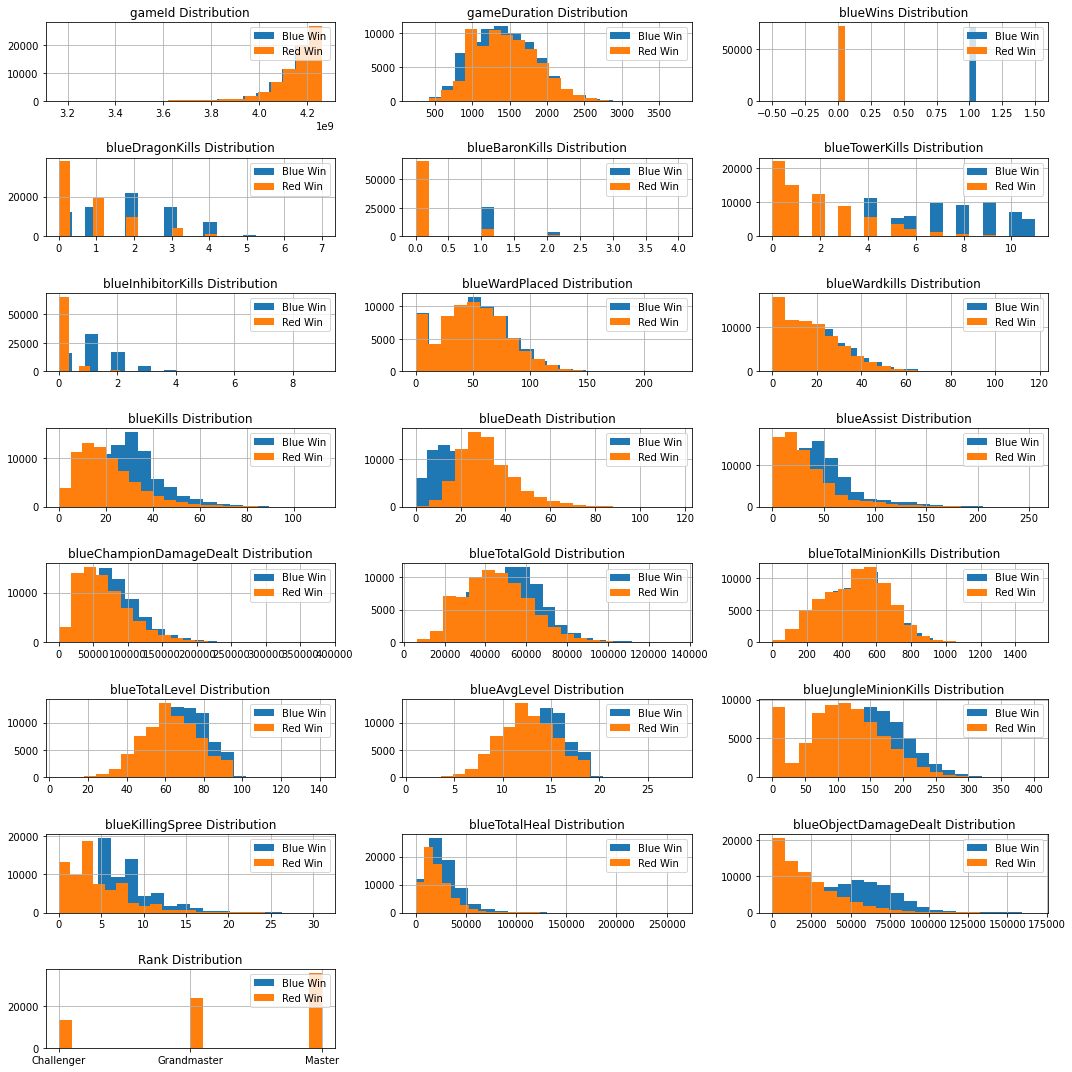

In [ ]:
def compare_histograms(df1, df2, variables, n_rows, n_cols):
  fig=plt.figure(figsize=(15,15))
  for i, var_name in enumerate(variables):
    ax=fig.add_subplot(n_rows,n_cols,i+1)
    df1[var_name].hist(bins=20, ax=ax, label="Blue Win") # for histogram
    df2[var_name].hist(bins=20, ax=ax, label="Red Win") # for histogram
    ax.set_title(var_name+" Distribution")
    pyplot.legend(loc="upper right")
    plt.tight_layout()
  plt.show()

compare_histograms(histogram_data_win, histogram_data_lose, histogram_data_win, 8, 3)

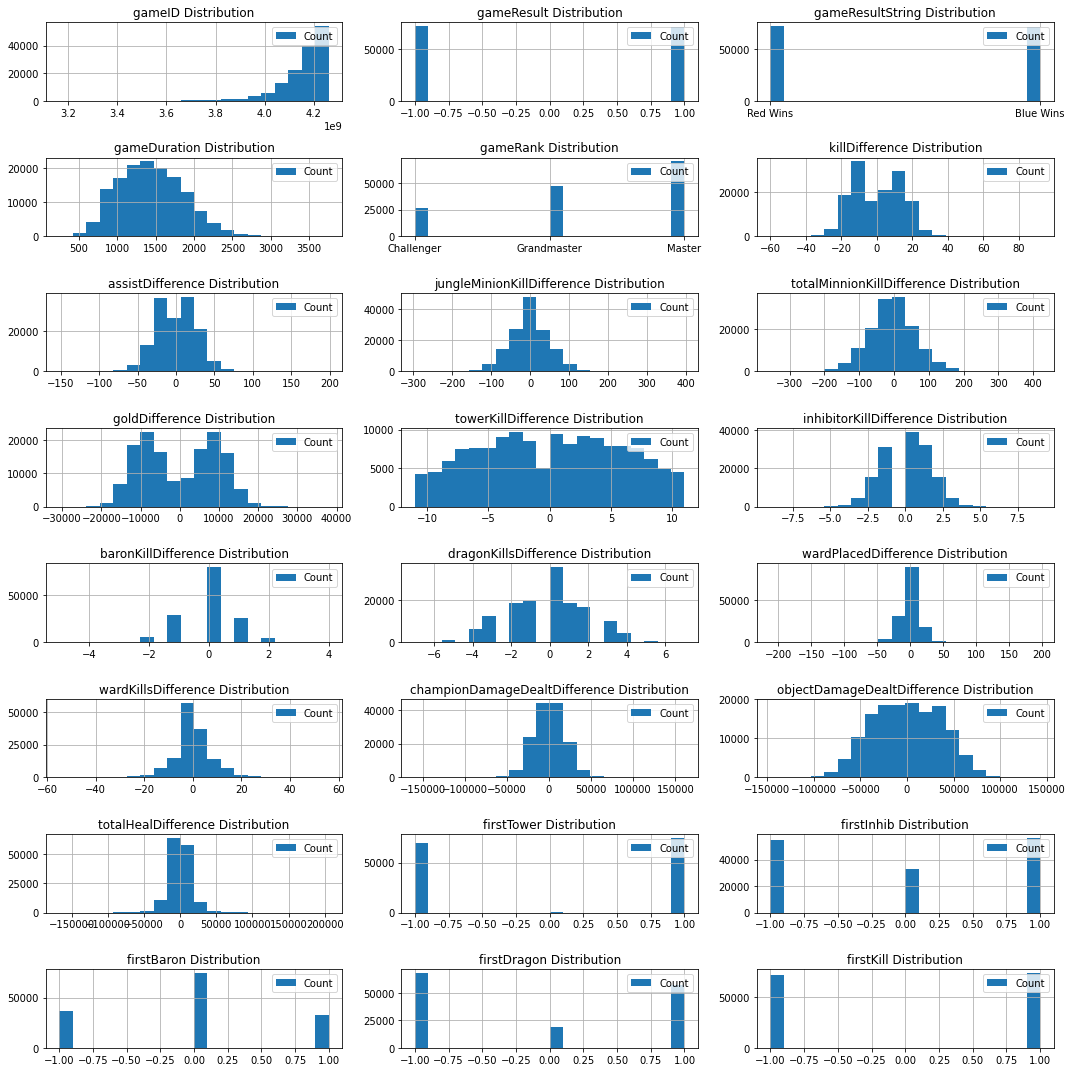

In [ ]:
def difference_histograms(df1, variables, n_rows, n_cols):
  fig=plt.figure(figsize=(15,15))
  for i, var_name in enumerate(variables):
    ax=fig.add_subplot(n_rows,n_cols,i+1)
    df1[var_name].hist(bins=20, ax=ax, label="Count") # for histogram
    ax.set_title(var_name+" Distribution")
    pyplot.legend(loc="upper right")
    plt.tight_layout()
  plt.show()

difference_histograms(df_difference, df_difference, 8, 3)

### Pie Charts
We used piecharts to display binary values. 

  * Including both win and lost games (i.e. all games):
    * Equal chance for both teams to get first blood
    * First dragon is prioritized greater than first baron


In [ ]:
piechart_col_names_blue = [c for c in df.columns if c.lower()[4:9] == "first" or "blueWin" in c]
piechart_col_names_red = [c for c in df.columns if c.lower()[3:8] == "first" or "redWin" in c]

piechart_red_win = red_win[piechart_col_names_red]
piechart_blue_win = blue_win[piechart_col_names_blue]

piechart_col_names_all = piechart_col_names_blue
piechart_col_names_all.extend(piechart_col_names_red)
# print(piechart_col_names_all)
piechart_all = df[piechart_col_names_all]
piechart_all.head()

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor
0,0,1,0,0,0,0,1,0,1,0,1,1
1,1,0,0,0,1,0,0,1,1,0,0,0
2,0,0,0,0,0,0,1,1,1,0,1,1
3,0,0,0,1,1,0,1,1,1,0,0,0
4,1,1,1,1,1,1,0,0,0,0,0,0


In [ ]:
def draw_piecharts(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15,15))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        percentages = list(df[var_name].value_counts(normalize=True, sort=False) * 100)
        labels = sorted(df[var_name].unique())
        # colors = ['blue', 'red']
        explode = ([0.02] * len(percentages))
        ax.pie(percentages,shadow=True, explode=explode, labels=labels, autopct='%1.1f%%')
        ax.set_title(var_name)

        ax.legend(
          title="# of occurances",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, percentages)]
          )
        plt.tight_layout()
    
    plt.show()

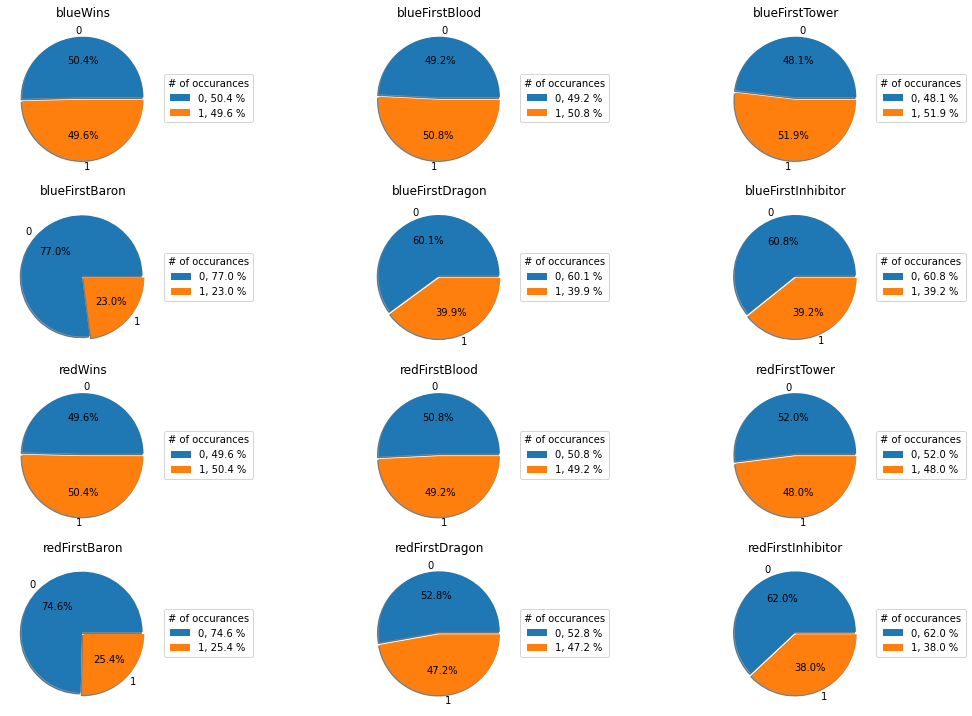

In [ ]:
draw_piecharts(piechart_all, piechart_all.columns, 6, 3)

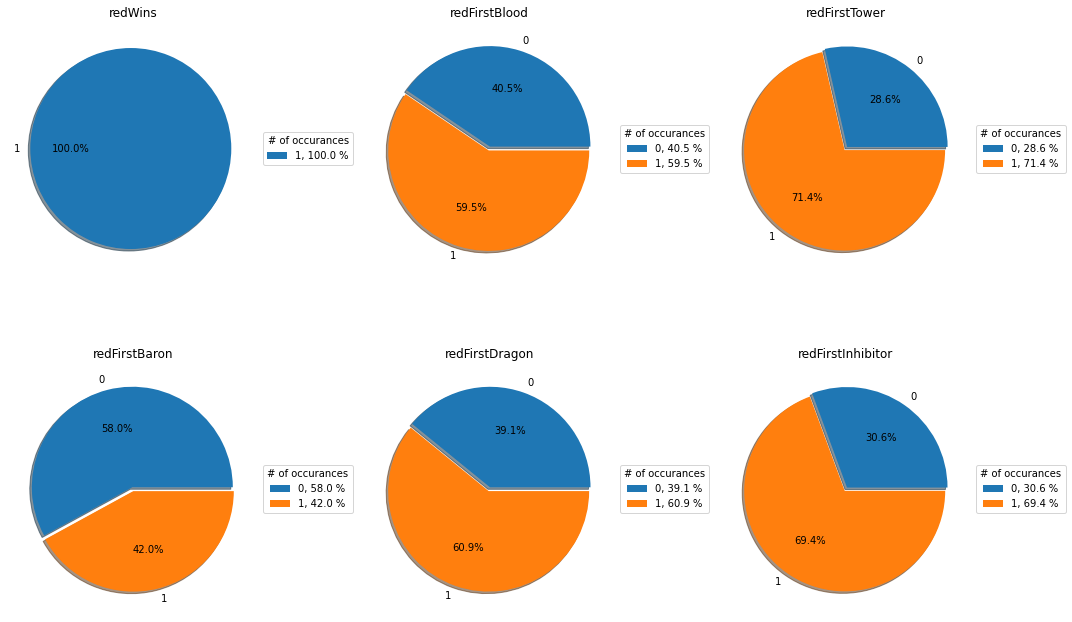

In [ ]:
draw_piecharts(piechart_red_win, piechart_red_win.columns, 3 ,3)

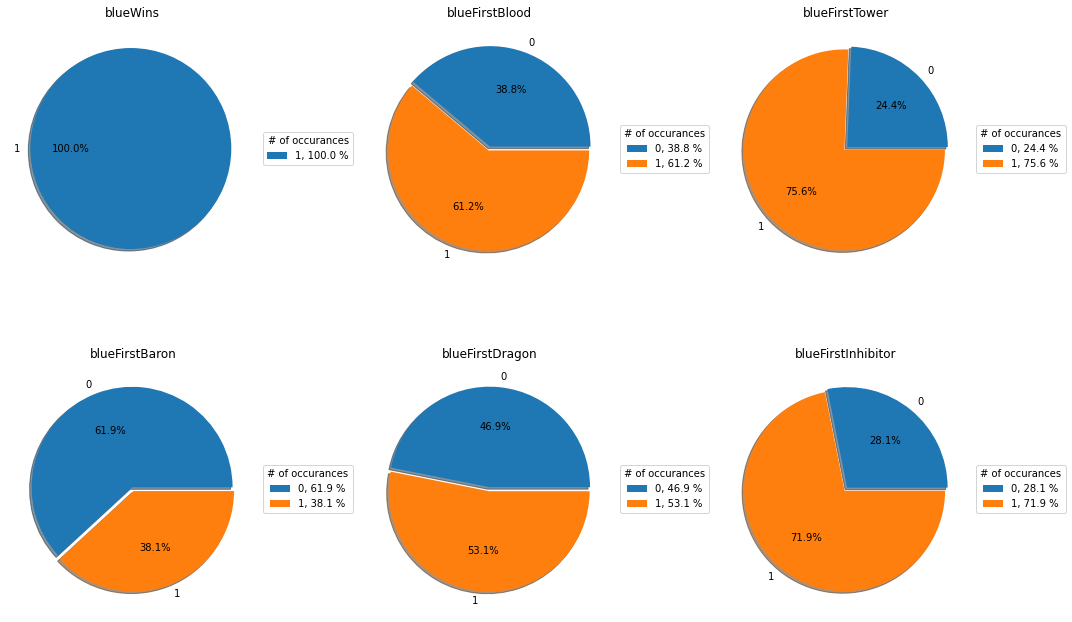

In [ ]:
draw_piecharts(piechart_blue_win, piechart_blue_win.columns, 3 ,3)

# Exploratory Data Analysis
After exploring our variables, we move on to the Exploratory Data Analysis. Here, we try to answer our primary question: when should you surrender a game of League of Legends based on the opposing team’s lead?

 

## (Exploratory) At what point should a team surrender with regards to the gold lead?
To answer this question, we used the gold difference and see it's relation to winning. 

* First, we used win percentages in relation to gold difference and plotted a line graph based on ranges. Here; logically, we can see the percentage of the team that wins has a greater gold difference advantage. However, we can see an outlier in the 30,000 range where a team lost despite it's gold lead. However, one thing to note is that both teams can reach its potential the longer the duration (having a full set of items).
* Second, we observe the summary statistics of gold difference in each team's wins. We also visualized these statistics through the use of histograms. In the 25 quartile of the win statistics, a 5000 gold lead is observed. We saw that majority of the time, an 8000 gold lead is more than enough to win a game of League of Legends. 

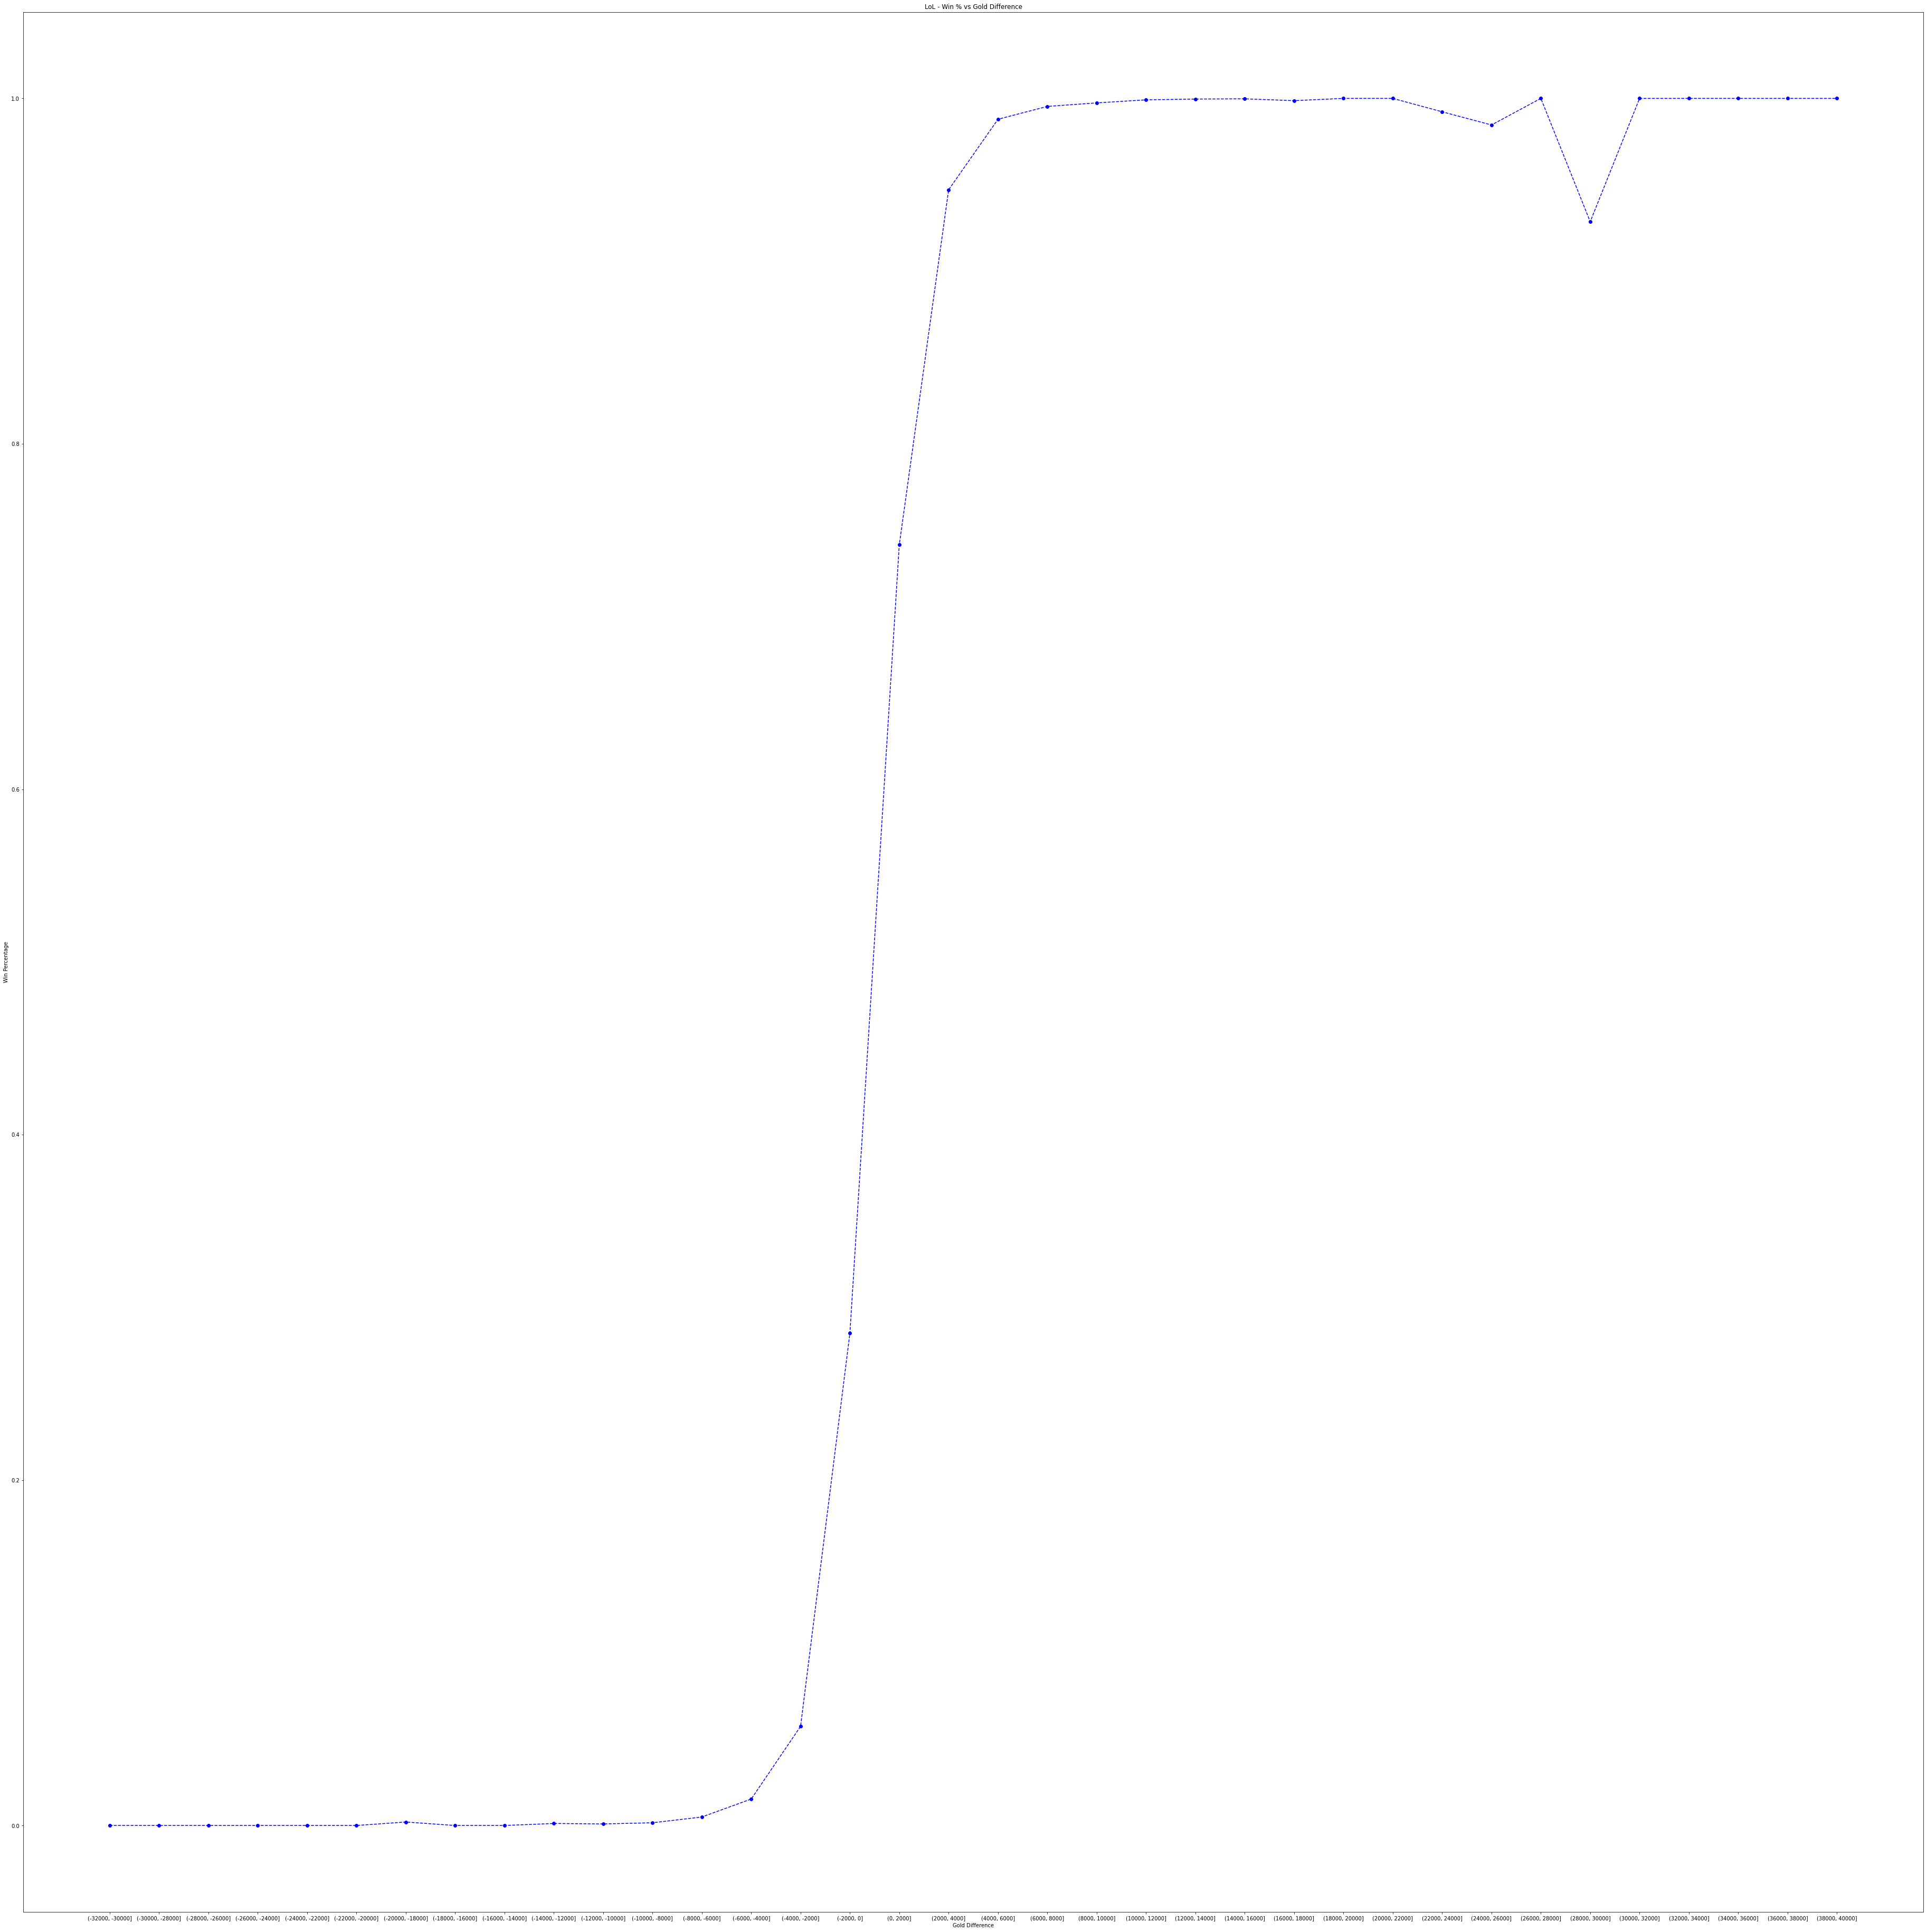

In [ ]:
# Win percentage and Gold difference
# df= pd.DataFrame({'number': np.random.randint(1, 100, 10)})
df_wpgd = pd.DataFrame()
df_wpgd['gameResult'] = df_difference['gameResult']
df_wpgd['goldDifference'] = df_difference['goldDifference']
bins = [-40000, -38000, -36000, -34000, -32000, -30000, -28000, -26000, -24000, 
        -22000, -20000, -18000, -16000, -14000, -12000, -10000, -8000, -6000, -4000, 
        -2000, 0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 22000, 
        24000, 26000, 28000, 30000, 32000, 34000, 36000, 38000, 40000]
# for x in range(17):
#   bins.append(start)
#   start = start + 5000
df_wpgd_ranges = df_wpgd
df_wpgd_ranges['range'] = pd.cut(x=df_wpgd['goldDifference'], bins=bins)


ranges = df_wpgd_ranges['range'].unique()
ranges = sorted(ranges)
winPercentages = []
rangesString = []
for range in ranges:
  df_winPercent = df_wpgd_ranges.loc[(df_wpgd_ranges['range'] == range)]
  gameTotal = df_winPercent['gameResult'].count()
  blueWin = df_winPercent.loc[(df_winPercent['gameResult']) == 1]
  blueWin = blueWin['gameResult'].count()
  winPercentages.append(blueWin/gameTotal)
  rangesString.append(str(range))

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
fig.set_size_inches(50, 50)
x = np.arange(-36000, 36000, 2000)
ax.plot(rangesString, winPercentages, linestyle='--', marker='o', color='b');

ax.set_xlabel('Gold Difference')
ax.set_ylabel('Win Percentage')
ax.set_title('LoL - Win % vs Gold Difference')
plt.show()

# print(df_wpgd_ranges)
# print(len(winPercentages))
# print(len(bins))
# fig=plt.figure()
# fig.set_size_inches(30, 10.5)
# plt.xlim
# ax=fig.add_axes([0,0,1,1])
# ax.scatter(rangesString,winPercentages)
# ax.set_xlabel('Gold Difference')
# ax.set_ylabel('Win Percentage')
# ax.set_title('LoL - Win % vs Gold Difference')
# plt.show()


As you can see in the line plot above, a gold advantage of -30000 to -8000 has a win percentage of 0%. Except for some anomalies that happen on the -20000 to -18000 range where the win percentage is slightly more than 0%. This can be explained in games where all players already reach their item limit so they don't need to use their gold anymore. 

A gold advantage of 2000 and above also has a win percentage of 90%+.

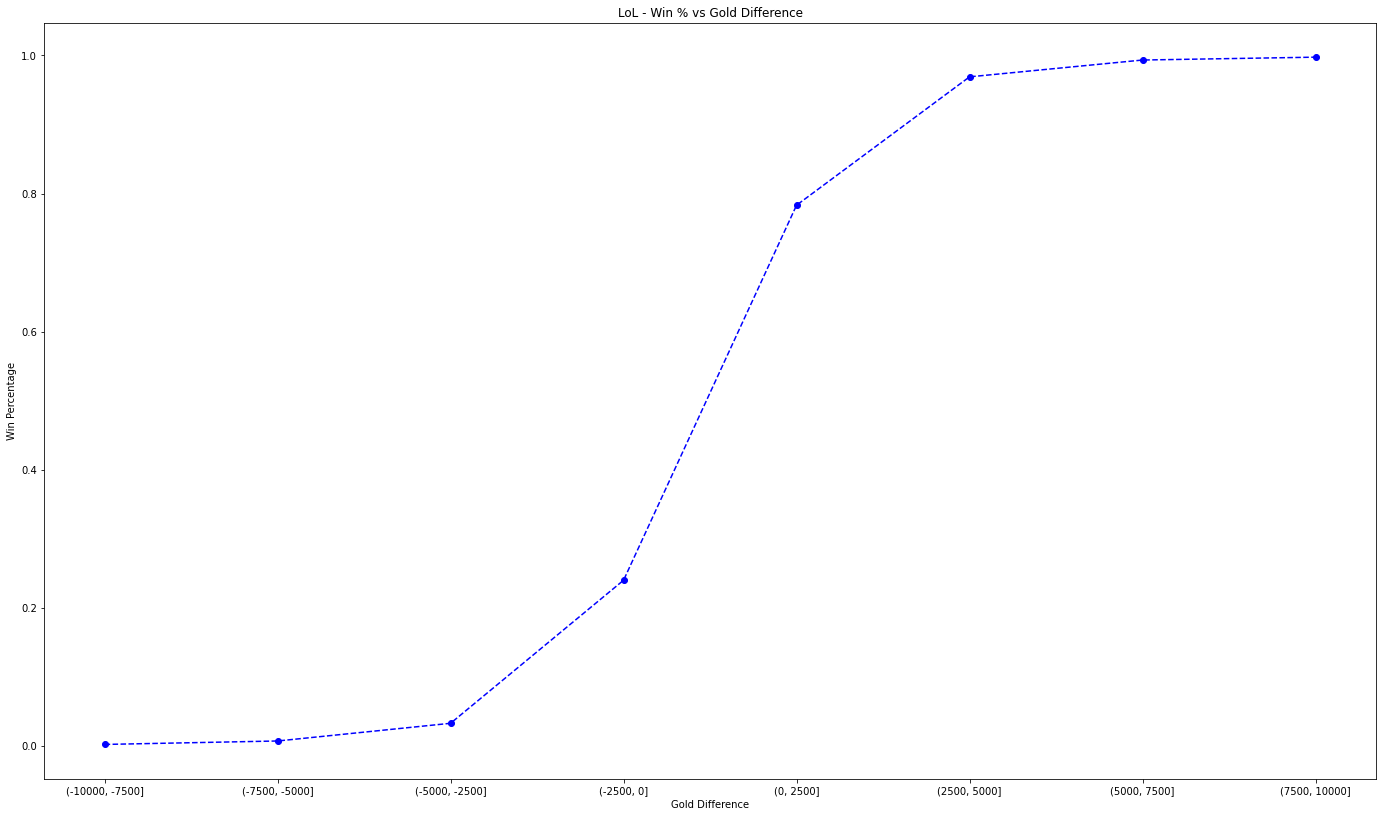

In [ ]:
# Win percentage and Gold difference
# df= pd.DataFrame({'number': np.random.randint(1, 100, 10)})
df_wpgd = pd.DataFrame()
df_wpgd['gameResult'] = df_difference['gameResult']
df_wpgd['goldDifference'] = df_difference['goldDifference']
start = -40000
bins = [ int(-10000), int(-7500), int(-5000), int(-2500), int( 0), int(2500), int(5000), int(7500), int(10000)]

#bins = [ -35000, -30000, -25000, -20000, -15000, -10000, -5000, 0, 10000, 15000,  20000, 25000, 30000, 35000, 40000]
# for x in range(17):
#   bins.append(start)
#   start = start + 5000
df_wpgd_ranges = df_wpgd
df_wpgd_ranges['range'] = pd.cut(x=df_wpgd['goldDifference'], bins=bins)


ranges = df_wpgd_ranges['range'].unique()


ranges = sorted(ranges[1:])
winPercentages = []
rangesString = []
for range in ranges:
  df_winPercent = df_wpgd_ranges.loc[(df_wpgd_ranges['range'] == range)]
  gameTotal = df_winPercent['gameResult'].count()
  blueWin = df_winPercent.loc[(df_winPercent['gameResult']) == 1]
  blueWin = blueWin['gameResult'].count()
  winPercentages.append(blueWin/gameTotal)
  rangesString.append(str(range))

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
fig.set_size_inches(18.5, 10.5)
x = np.arange(-10000, 10000, 2500)
ax.plot(rangesString, winPercentages, linestyle='--', marker='o', color='b');

ax.set_xlabel('Gold Difference')
ax.set_ylabel('Win Percentage')
ax.set_title('LoL - Win % vs Gold Difference')
plt.show()

# fig=plt.figure()
# fig.set_size_inches(30, 10.5)
# plt.xlim
# ax=fig.add_axes([0,0,1,1])
# ax.scatter(rangesString,winPercentages)
# ax.set_xlabel('Gold Difference')
# ax.set_ylabel('Win Percentage')
# ax.set_title('LoL - Win % vs Gold Difference')
# plt.show()

In [ ]:
df_wpgd_blueWins = pd.DataFrame() 
df_wpgd_blueWins = df_wpgd.loc[(df_wpgd['gameResult']) == 1]
df_wpgd_blueWins.describe()

,gameResult,goldDifference
count,71523.0,71523.000000
mean,1.0,8467.910644
std,0.0,4338.897887
min,1.0,-19396.000000
25%,1.0,5554.000000
50%,1.0,8566.000000
75%,1.0,11329.000000
max,1.0,38033.000000


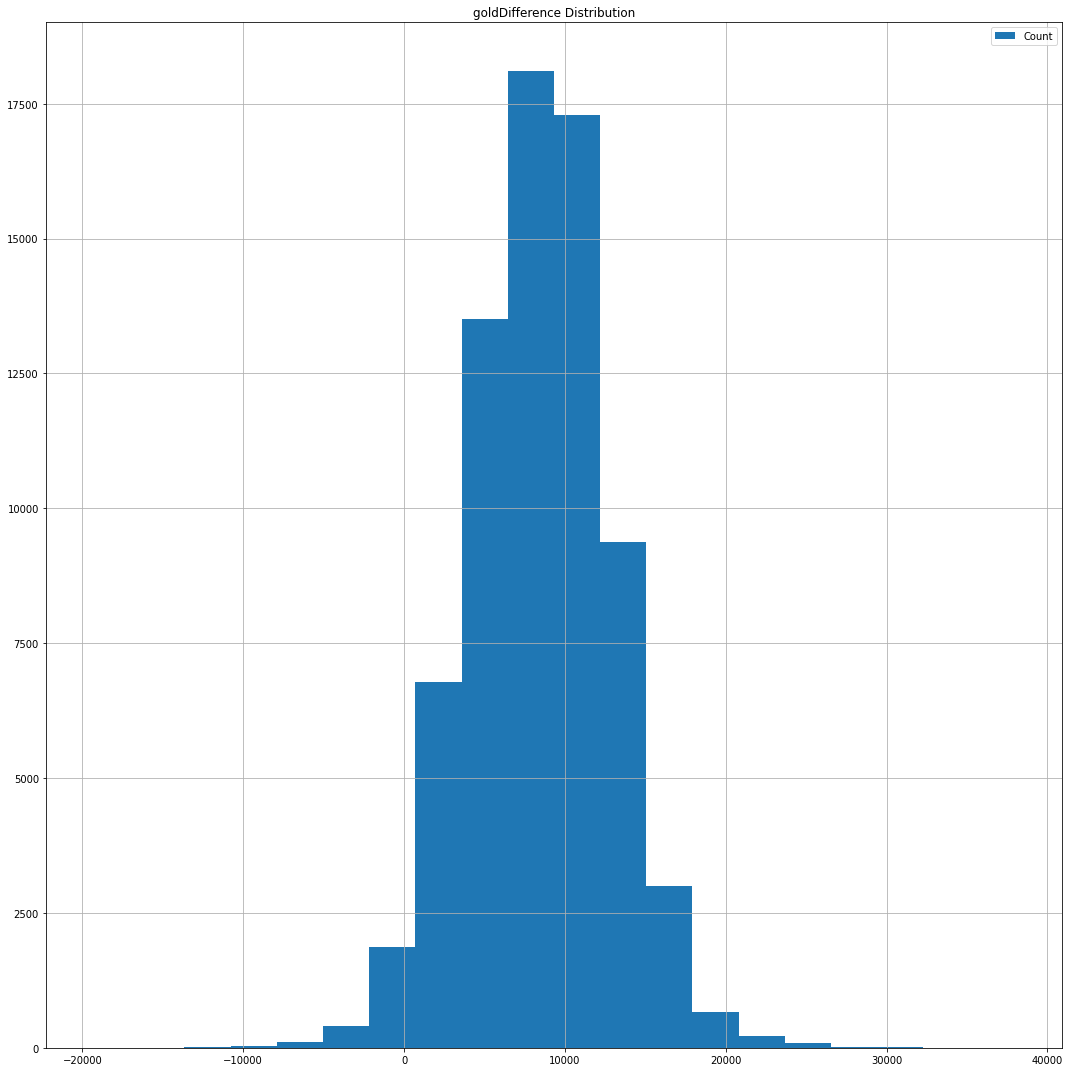

In [ ]:
difference_histograms(df_wpgd_blueWins, ['goldDifference'], 1, 1)

In [ ]:
df_wpgd_redWins = pd.DataFrame() 
df_wpgd_redWins = df_wpgd.loc[(df_wpgd['gameResult']) == -1]
df_wpgd_redWins['goldDifference'] = df_wpgd_redWins['goldDifference'] *-1
df_wpgd_redWins.describe()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,gameResult,goldDifference
count,72580.0,72580.000000
mean,-1.0,8539.157826
std,0.0,4224.540772
min,-1.0,-29029.000000
25%,-1.0,5648.000000
50%,-1.0,8675.000000
75%,-1.0,11457.000000
max,-1.0,30745.000000


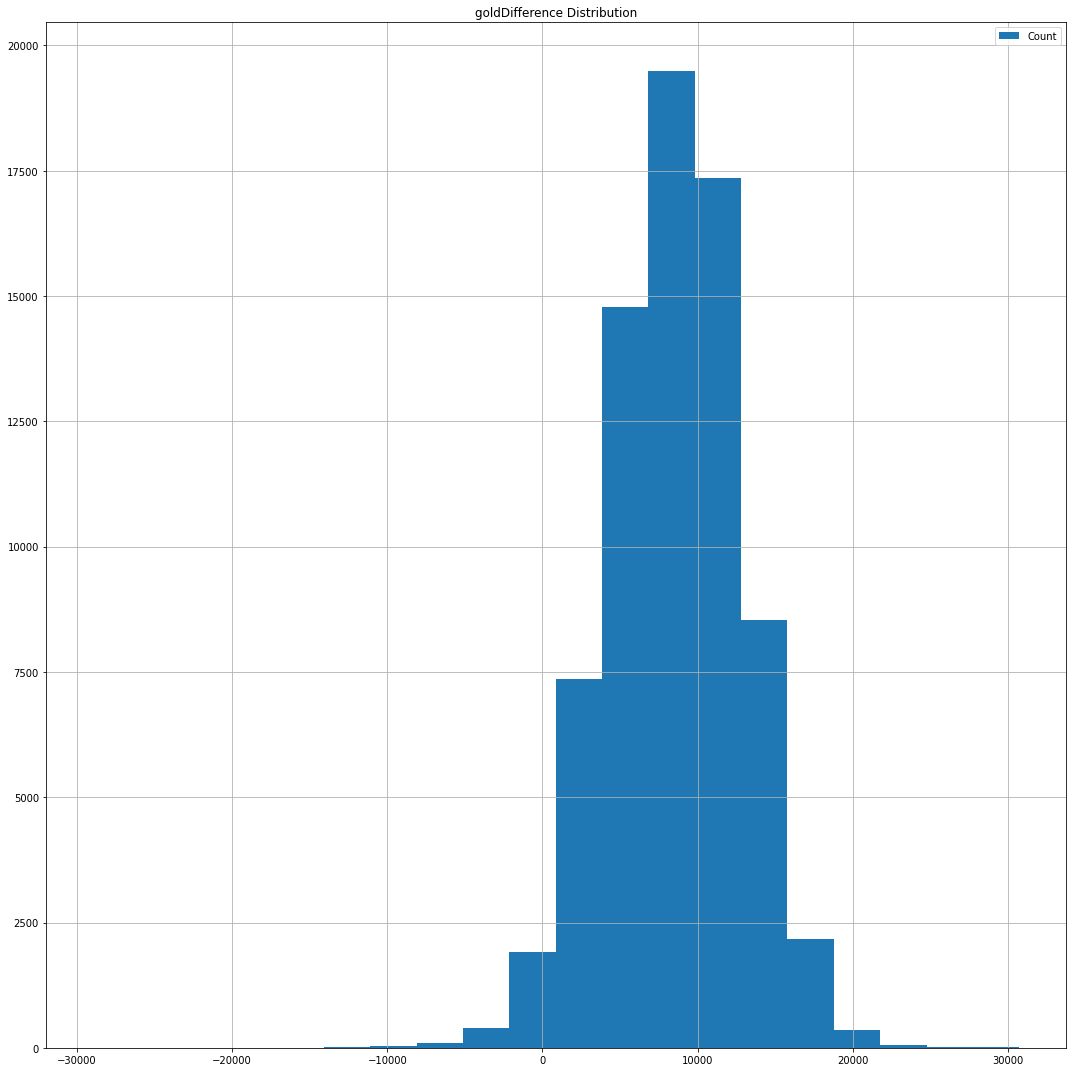

In [ ]:
difference_histograms(df_wpgd_redWins, ['goldDifference'], 1, 1)

## (Exploratory) Is vision important in winning games?
Because of the lack of time stamps in the data set, we assume that vision is simply wards placed vs wards destroyed. In answering this questions we did a multivariate analysis on ward kills, ward destroyed, and blue team win or lose by using a bar plot. We combined the total of ward placed and ward destroyed in won games and lost games and see if there are any significant difference.
* Here we could see that vision has minimal impact on winning and losing games
* However, there is a clear trend that winning team have more wards placed and more wards killed.  
* We would also like to note that in high-elo games vision is highly competitive so we can see a close ratio on wards placed and ward kills. 

In [ ]:
ward_df = pd.DataFrame()
ward_df['gameResult'] = df['blueWins']
ward_df['blueWardPlaced']= df['blueWardPlaced']
ward_df['blueWardKills']= df['blueWardkills']
ward_df['redWardPlaced']= df['redWardPlaced']
ward_df['redWardKills']= df['redWardkills']
ward_df = ward_df.groupby(['gameResult']).sum()
ward_df.head()

,blueWardPlaced,blueWardKills,redWardPlaced,redWardKills
gameResult,,,,
0,3667501,1269783,3859014,1410487
1,3705108,1371302,3528810,1187886


[Text(0, 0, 'Red Wins'), Text(0, 0, 'Blue Wins')]

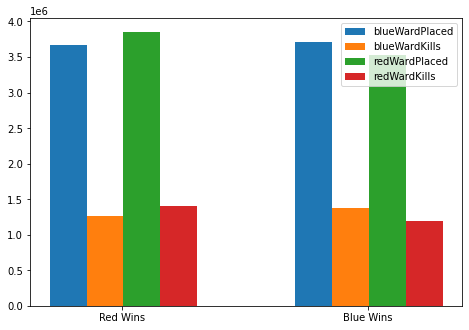

In [ ]:
data = [[3667501, 3705108],
[1269783, 1371302],
[3859014, 3528810],
[1410487, 1187886]]
X = np.arange(2)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], width = 0.15, label="blueWardPlaced")
ax.bar(X + 0.15, data[1], width = 0.15, label="blueWardKills")
ax.bar(X + 0.30, data[2], width = 0.15, label="redWardPlaced")
ax.bar(X + 0.45, data[3], width = 0.15, label="redWardKills")
ax.set_xticks([0.22,1.22])
ax.legend()
ax.set_xticklabels(['Red Wins', 'Blue Wins'])

Wards Placed and Killed Trend
- When red team wins, their wards placed and killed are higher. When blue team wins, their wards placed and killed are higher. 

## (Inferential) Which objectives should we prioritize in going for a win, Epic Monsters or Structures?
In this questions, we gathered the coefficients of a logistic regression model of predicting a win with regards to objectives. 
* We see that variables relating to structures such as firstTowerKill, firstInhibitorKill, Tower Kills and Inhibitor kills has higher coefficients to variables relating to Epic Monsters. 
* Structure objectives should generally be more prioritized. 

In [ ]:
df_objectives = pd.DataFrame()
objectives_col_names = [c for c in df.columns if ("dragon" in c.lower() or "baron" in c.lower() or "tower" in c.lower() or "inhibitor" in c.lower() or "win" in c.lower()) and "red" not in c.lower()]
df_objectives = df[objectives_col_names]
df_objectives.head()


,blueWins,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills
0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,2,0,4,0
2,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,1,1,2,0
4,1,1,1,1,1,2,2,11,3


In [ ]:
import statsmodels.api as sm

y_train = df_objectives["blueWins"]
norm_X_train = df_objectives.drop(["blueWins"], axis=1)
X = norm_X_train.to_numpy()
Y = y_train
model = sm.Logit(Y,X).fit()
predictions = model.predict(X)
print_model = model.summary(xname=list(norm_X_train.columns))
print(print_model)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.534350
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               blueWins   No. Observations:               144103
Model:                          Logit   Df Residuals:                   144095
Method:                           MLE   Df Model:                            7
Date:                Wed, 02 Jun 2021   Pseudo R-squ.:                  0.2291
Time:                        11:56:27   Log-Likelihood:                -77001.
converged:                       True   LL-Null:                       -99881.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
blueFirstTower         0.0277      0.015      1.900      0.057      -0.001       0.056
blueF

Observing the coefficients:
- First Baron and First Dragon have a lesser impact to winning rather than getting the First Tower and Inhibitor. 
- This can be explained because the inhibitors are the last structures you need to destroy before destroying their base. 

- This trend is also confirmed on the total objective kills. Total Dragon and Baron kills have lesser coeffients than Tower and Inhibitor kills. 

#Conclusion

- A team can think of surrendering the match when they have a gold disadvantage of over -8000. This is because the chances of them winning are less than 1%
- Vision is important because it shows that the team that as more vision usually ends up winning the game. 
- Lastly, towers and inhibitors contribute to winning games more than dragons and barons. Because of this, they should be pr